In [56]:
import pandas as pd
import us

In [57]:
flood_dataset = pd.read_csv('Flood Data.csv')

In [58]:
# CHANGE CATEGORY TO DEATHS, OCCURRENCE REMAINS
death_dict = {}
occurrence_dict = {}
state_death = flood_dataset[['State', 'Deaths']]
# Fill in hurricane category dictionary, if repeat is found, find the average and add the average category
for index, row in state_death.iterrows():
    if row['State'] in occurrence_dict:
#         EXISTS
        occurrence_dict[row['State']] += 1
        # mean_num = mean(magnitude_dict[row['state']], row['mag'])
        death_dict[row['State']] += row['Deaths']
    else:
#         DOES NOT EXIST
        occurrence_dict[row['State']] = 1
        death_dict[row['State']] = row['Deaths']
# CONVERT STATE TO ABBR
for row in list(occurrence_dict):
    state = us.states.lookup(row)
    if state:
        abbr = state.abbr
        occurrence_num = occurrence_dict[row]
        death_num = death_dict[row]
        del occurrence_dict[row]
        del death_dict[row]
        occurrence_dict[abbr] = occurrence_num
        death_dict[abbr] = death_num
    else:
        del occurrence_dict[row]
        del death_dict[row]
        
occurrence_df = pd.DataFrame(occurrence_dict.items(), columns = ['State','Occurrences'])
death_df = pd.DataFrame(death_dict.items(), columns = ['State', 'Deaths'])

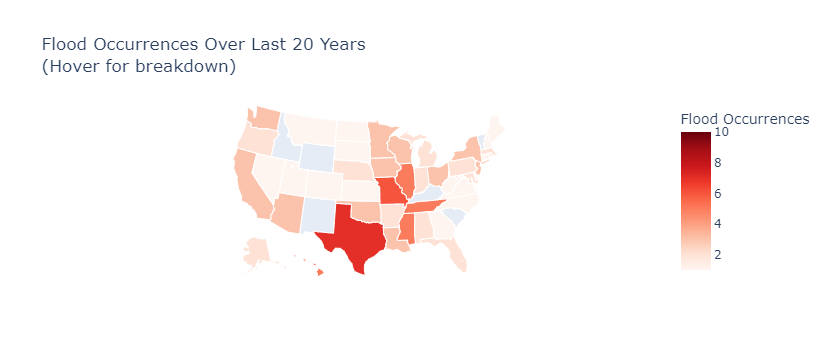

In [61]:
import plotly.graph_objects as go

for col in occurrence_df.columns:
    occurrence_df[col] = occurrence_df[col].astype(str)

occurrence_df['text'] = 'State: ' + occurrence_df['State'] + '<br>' + \
    'Occurrences: ' + occurrence_df['Occurrences']

fig = go.Figure(data=go.Choropleth(
    locations=occurrence_df['State'],
    z=occurrence_df['Occurrences'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=occurrence_df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Flood Occurrences",
    zmax=10,
    zmin=1
))

fig.update_layout(
    title_text='Flood Occurrences Over Last 20 Years<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

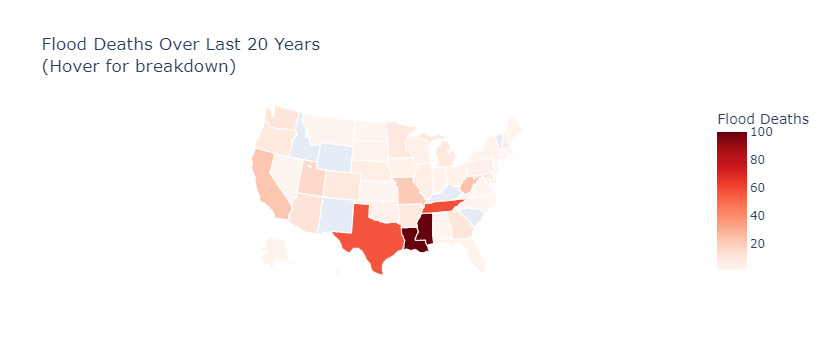

In [64]:
import plotly.graph_objects as go

for col in death_df.columns:
    death_df[col] = death_df[col].astype(str)

death_df['text'] = 'State: ' + death_df['State'] + '<br>' + \
    'Deaths: ' + death_df['Deaths']

fig = go.Figure(data=go.Choropleth(
    locations=death_df['State'],
    z=death_df['Deaths'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=death_df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Flood Deaths",
    zmax=100,
    zmin=1
))

fig.update_layout(
    title_text='Flood Deaths Over Last 20 Years<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()